In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version  1.0.4
Version:  0.0.22


## make a fake image data set without square images

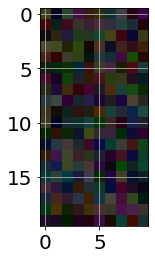

In [4]:
for i in range(100):
    im=rand(20,10,3)*0.3
    imsave('test images/cat/%d.jpg' % i,im)
imshow(im)

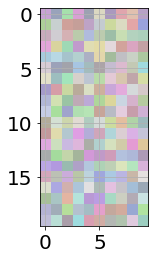

In [5]:
for i in range(100):
    im=rand(20,10,3)*0.3+.6
    imsave('test images/dog/%d.jpg' % i,im)
imshow(im)

In [56]:
images=image.load_images('test images/')

[cat]: 100 files found
[dog]: 100 files found


In [58]:
data=image.images_to_vectors(images,verbose=False)

In [59]:
data.vectors/=255

In [61]:
summary(data)

200 vectors of length 600
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p595', 'p596', 'p597', 'p598', 'p599'  (600 features)
Target values given.
Target names: 'cat', 'dog'
Mean:  [0.45601961 0.45329412 0.45368627 0.44631373 0.44360784 0.44454902
 0.44613725 0.44305882 0.44401961 0.45392157 0.45021569 0.45237255
 0.45427451 0.45003922 0.45264706 0.45327451 0.44894118 0.45188235
 0.45011765 0.44462745 0.44817647 0.45292157 0.44605882 0.44988235
 0.45047059 0.44239216 0.44701961 0.44958824 0.44007843 0.44470588
 0.4507451  0.4465098  0.44623529 0.44360784 0.44009804 0.44
 0.45756863 0.45366667 0.45394118 0.44947059 0.44592157 0.44623529
 0.45372549 0.45001961 0.45078431 0.4454902  0.44215686 0.44264706
 0.44407843 0.44062745 0.4412549  0.45682353 0.45327451 0.45407843
 0.45245098 0.44860784 0.4487451  0.45162745 0.44731373 0.44733333
 0.45421569 0.45064706 0.45027451 0.44178431 0.43845098 0.438
 0.44439216 0.44139216 0.44094118 0.44678431 0.44503922 0.44503922
 0.44703922 0.446

In [9]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (200, 600)
Train vector shape:  (160, 600)
Test vector shape:  (40, 600)


In [10]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 100.0


In [12]:
C.means.shape

(2, 600)

In [13]:
p = C.means[0].reshape(20,10,3)

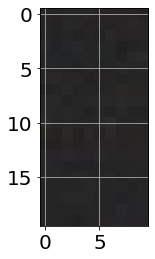

In [15]:
imshow(p)

In [16]:
p = C.means[1].reshape(20,10,3)

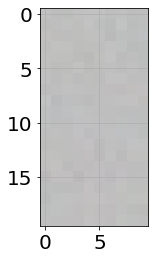

In [17]:
imshow(p)

In [45]:
images=image.load_images('armen images/')

[piece 1]: 575 files found
[blank]: 63 files found
[piece 2]: 423 files found


In [46]:
data=image.images_to_vectors(images)
data.vectors/=255

1061 vectors of length 58125
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p58120', 'p58121', 'p58122', 'p58123', 'p58124'  (58125 features)
Target values given.
Target names: 'piece 1', 'blank', 'piece 2'
Mean:  [251.89161169 251.89161169 251.89161169 ... 254.99528746 255.
 254.99528746]
Median:  [253. 253. 253. ... 255. 255. 255.]
Stddev:  [2.07778414 2.07778414 2.07778414 ... 0.15342903 0.         0.15342903]


In [47]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (1061, 58125)
Train vector shape:  (848, 58125)
Test vector shape:  (213, 58125)


In [48]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 98.12206572769952


# Prototypes

These prototypes look all the same....why?

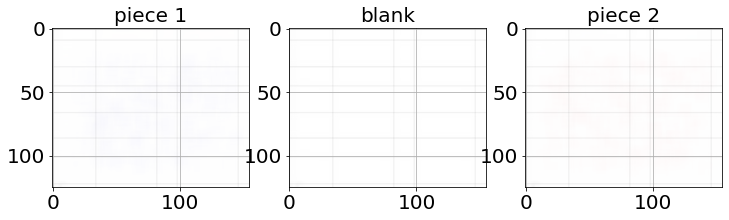

In [49]:
figure(figsize=(12,6))
p={}
for i in range(3):
    subplot(1,3,i+1)
    p[i] = C.means[i].reshape(data.shape)
    imshow(p[i])
    title(data.target_names[i])

In [51]:
data.target_names

['piece 1', 'blank', 'piece 2']

In [53]:
piece1=0
piece2=2
blank=1

look at differences -- piece 2 minus blank, and piece 1 minus blank, rescaled to fill the color space.

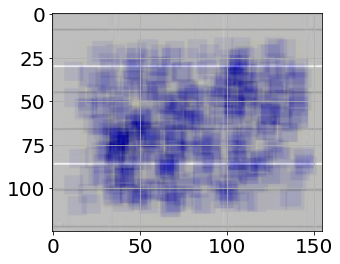

In [54]:
d=p[piece1]-p[blank]
d=d-d.min()
d=d/d.max()
imshow(d)

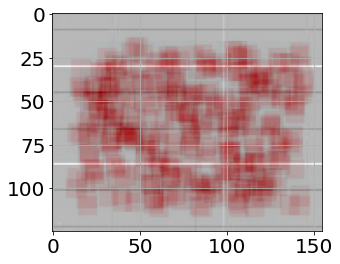

In [55]:
d=p[piece2]-p[blank]
d=d-d.min()
d=d/d.max()
imshow(d)